# Graphes leçon 2

Le but de cette séance est d'utiliser les représentations de graphes pour asseoir quelques réflexes de programmation.

Voici deux graphes sur lesquelles vous allez travailler.
<div class="alert" style="background-color: #fdebd0;border-left:1px solid #a04000 ">
    Voici un petit vocabulaire concernant les graphes
<dl>
    <dt style="color: #a04000;font-weight:600">degré d'un sommet $s$:</dt>
    <dd>nombre d'arêtes ayant pour extrémité ce sommet $s$ (on parle de voisinage du sommet)</dd>
    <dt style="color: #a04000;font-weight:600">longueur d'un chemin $L$:</dt>
    <dd>nombre d'âretes composant le chemin $L$</dd>
    <dt style="color: #a04000;font-weight:600">distance entre deux sommets $a$ et $b$.</dt>
    <dd>la plus petite longueur des chemins reliants $a$ et $b$.</dd>
    <dt style="color: #a04000;font-weight:600">diamètre d'un graphe</dt>
    <dd>la plus grande distance entre les sommets d'un graphe</dd>
</dl>
</div>

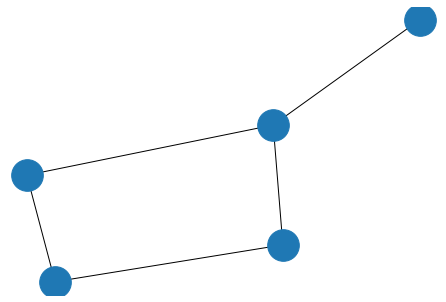

In [9]:
import networkx as nx
import numpy as np

g = nx.Graph() 

g.add_edge(1, 2) 
g.add_edge(2, 3) 
g.add_edge(3, 4) 
g.add_edge(1, 4) 
g.add_edge(1, 5)

nx.draw(g,with_labes=True,node_size=1000)

## Exercice 1

1. Identifiez sur ce dessin le sommet 1.
2. Donnez la représentation de cette arbre avec un dictionnaire
3. Créer une fonction `degre`, qui possède deux paramètres (un graphe et un sommet) et qui retourne le degré de celui-ci.

In [10]:
# taper la solution ici
# Sommet 1, sommet central
G1={
    "1":["2","4","5"],
    "2":["1","3"],
    "3":["2","4"],
    "4":["1","3"],
    "5":["1"]
}

def degre(graphe, sommet) :
    return len(graphe.get(sommet))

# G1.get("2") -> ["1","3"] len -> donner la longueur de la liste
degre(G1,"5")

1

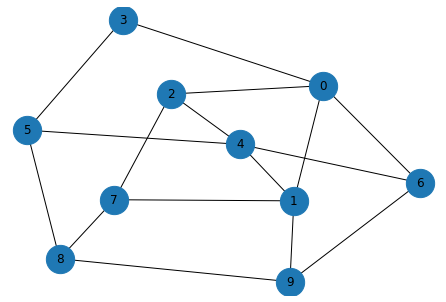

In [23]:
G = nx.Graph()

nx.add_path(G,[3, 5, 4, 1, 0, 2, 7, 8, 9, 6])
nx.add_path(G,[3, 0, 6, 4, 2, 7, 1, 9, 8, 5])
nx.draw(G,with_labels=True,node_size=800)
A = nx.to_numpy_matrix(G,nodelist=(0,1,2,3,4,5,6,7,8,9))

## Exercice 2

Le but est de calculer le diamètre du graphe précédent. Pour ce faire on va avoir besoin du résultat suivant:

<div class="alert" style="background-color: #f4ecf7;border-left:1px solid #a569bd  ">
   On considère un graphe G dont les sommets sont numérotés  de $0$ à $n-1$ et on note  $A=(a_{ij})$ sa matrice d'adjacence.
<dl>
    <dt style="color:#8e44ad;font-weight:600">Propriété 1</dt>
    <dd>Le coefficient à la ligne $i$ et la colonne $j$ de $A^p$ représente le nombre de chemins de longueur $p$ allant du sommet $i$ au sommet $j$.</dd>   
</dl>
</div>

Remarque: *pour faciliter la programmation, on n'utilise pas les notions mathématiques qui numérotent habituellement les lignes de 1 à n et les colonnes de 1 à n*.

### Partie A

1. Afficher la matrice $A$.
2. Afficher la liste des voisins de 0.
3. Donner le degré du sommet 0.

In [16]:
# Afficher la matrice d'adjacence du graphe précédent
print(A)
print("-----------------------")
print(A[0])

# le degré de 0 est 2
cpt = 0
for i in range(10):
    cpt = cpt+A[9,i]
print(cpt)

[[0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 1. 0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [1. 0. 0. 1. 0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0. 1.]
 [0. 0. 1. 0. 1. 0. 0. 0. 1. 0.]]
-----------------------
[[0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]]
3.0


### Partie B

1. Écrire une fonction qui donne le degré d'un sommet (paramètres le numéro du sommet et la matrice).
2. Écrire une fonction `chemin` qui donne le nombre de chemin de longueur $l$ allant du sommet $i$ au sommet $j$.
    ```python
    # B=A^2 s'écrit
    B = np.dot(A,A)
    ```
3. Écrire une fonction `distance` qui donne la distance entre deux sommets.
4. Enfin, écrire une fonction `diametre` qui calcule le diamètre d'un graphe.

In [17]:
def degre(sommet,M):
    cpt = 0
    for i in range(10):
        cpt = cpt+M[sommet,i]
    return cpt

        

In [20]:
degre(1,A)

3.0

In [24]:
B = np.dot(A,A) 

In [25]:
# le nombre de chemins entre le sommet 2 et le sommet 4
B[2,4]

0.0

In [26]:
C=np.dot(B,A)

In [27]:
C[2,4]

9.0

In [30]:
np.dot(A,A,A)

matrix([[34.,  1.,  1.,  3., 32., 11.,  1., 25.,  3., 25.],
        [ 1., 40., 31., 14.,  3., 13., 31.,  1., 21.,  1.],
        [ 1., 31., 25., 11.,  2., 11., 24.,  1., 15.,  1.],
        [ 3., 14., 11.,  9.,  7.,  3., 11.,  2., 10.,  2.],
        [32.,  3.,  2.,  7., 35.,  7.,  2., 24.,  8., 24.],
        [11., 13., 11.,  3.,  7., 15., 11., 10.,  4., 10.],
        [ 1., 31., 24., 11.,  2., 11., 25.,  1., 15.,  1.],
        [25.,  1.,  1.,  2., 24., 10.,  1., 22.,  2., 21.],
        [ 3., 21., 15., 10.,  8.,  4., 15.,  2., 17.,  2.],
        [25.,  1.,  1.,  2., 24., 10.,  1., 21.,  2., 22.]])